In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Mirella Glowinska C00275764

Dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
csv_file_path = '/content/drive/MyDrive/Datasets/Housing.csv'
df = pd.read_csv(csv_file_path)
copy_df =  pd.read_csv(csv_file_path)
print(df.head())
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [11]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [12]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 545
Number of columns: 13


In [13]:
numeric_columns = df.select_dtypes(include=['number'])

print("Minimum values for each category:")
print(numeric_columns.min())

print("\nMaximum values for each category:")
print(numeric_columns.max())

Minimum values for each category:
price        1750000
area            1650
bedrooms           1
bathrooms          1
stories            1
parking            0
dtype: int64

Maximum values for each category:
price        13300000
area            16200
bedrooms            6
bathrooms           4
stories             4
parking             3
dtype: int64


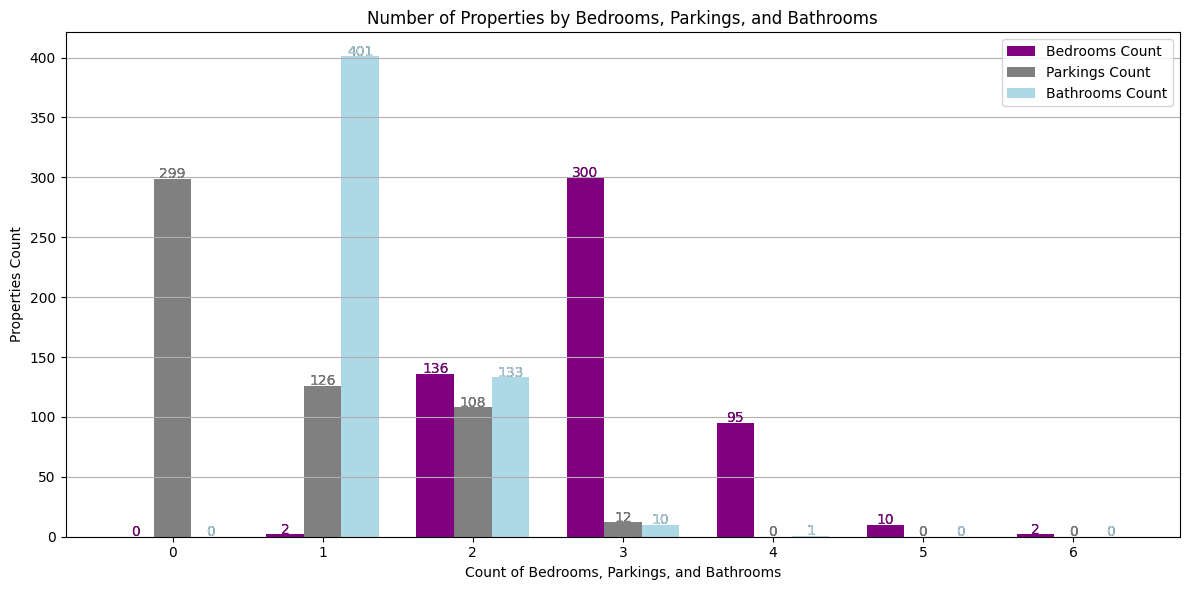

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bedrooms_count = df['bedrooms'].value_counts().sort_index()
parkings_count = df['parking'].value_counts().sort_index()
bathrooms_count = df['bathrooms'].value_counts().sort_index()

categories = sorted(set(bedrooms_count.index).union(set(parkings_count.index)).union(set(bathrooms_count.index)))
bedroom_values = [bedrooms_count.get(cat, 0) for cat in categories]
parking_values = [parkings_count.get(cat, 0) for cat in categories]
bathroom_values = [bathrooms_count.get(cat, 0) for cat in categories]

bar_width = 0.25
x = np.arange(len(categories))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, bedroom_values, width=bar_width, color='purple', label='Bedrooms Count')
plt.bar(x, parking_values, width=bar_width, color='grey', label='Parkings Count')
plt.bar(x + bar_width, bathroom_values, width=bar_width, color='lightblue', label='Bathrooms Count')

plt.xlabel('Count of Bedrooms, Parkings, and Bathrooms')
plt.ylabel('Properties Count')
plt.title('Number of Properties by Bedrooms, Parkings, and Bathrooms')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y')

for index in x:
    plt.text(index - bar_width, bedroom_values[index] + 0.5, str(bedroom_values[index]), ha='center')
    plt.text(index, parking_values[index] + 0.5, str(parking_values[index]), ha='center')
    plt.text(index + bar_width, bathroom_values[index] + 0.5, str(bathroom_values[index]), ha='center')

for index in x:
    plt.text(index - bar_width, bedroom_values[index] + 0.5, str(bedroom_values[index]), ha='center', color='purple')
    plt.text(index, parking_values[index] + 0.5, str(parking_values[index]), ha='center', color='grey')
    plt.text(index + bar_width, bathroom_values[index] + 0.5, str(bathroom_values[index]), ha='center', color='lightblue')

plt.tight_layout()
plt.show()

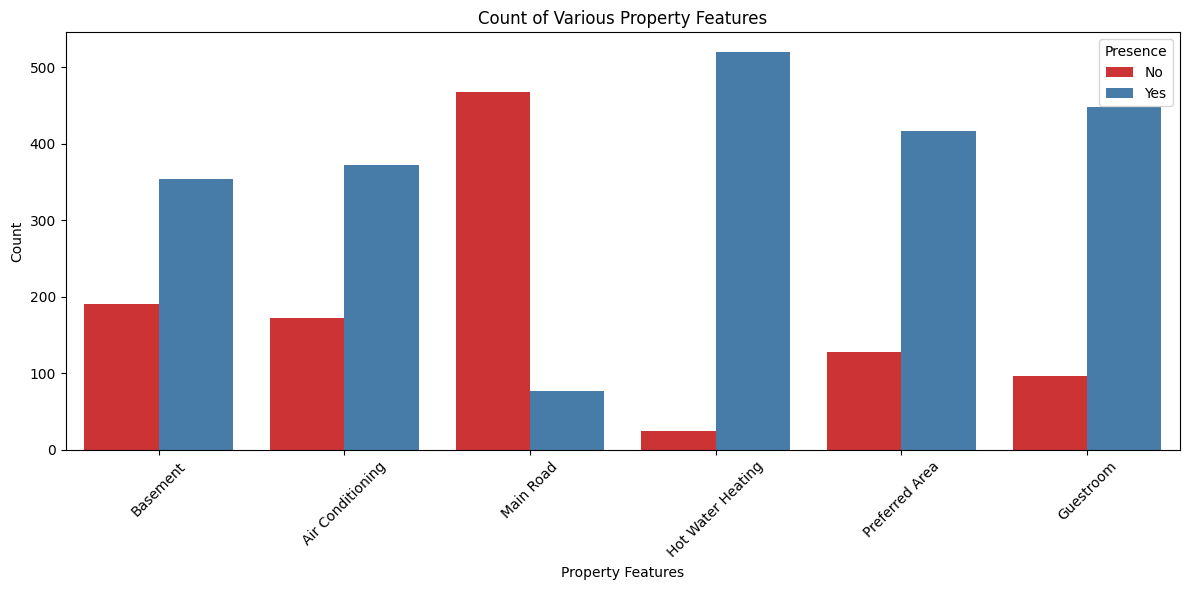

In [15]:
count_data = {
    'Feature': [
        'Basement', 'Basement',
        'Air Conditioning', 'Air Conditioning',
        'Main Road', 'Main Road',
        'Hot Water Heating', 'Hot Water Heating',
        'Preferred Area', 'Preferred Area',
        'Guestroom', 'Guestroom'
    ],
    'Presence': [
        'No', 'Yes',
        'No', 'Yes',
        'No', 'Yes',
        'No', 'Yes',
        'No', 'Yes',
        'No', 'Yes',
    ],
    'Count': [
        df['basement'].value_counts().get('yes', 0),
        df['basement'].value_counts().get('no', 0),
        df['airconditioning'].value_counts().get('yes', 0),
        df['airconditioning'].value_counts().get('no', 0),
        df['mainroad'].value_counts().get('yes', 0),
        df['mainroad'].value_counts().get('no', 0),
        df['hotwaterheating'].value_counts().get('yes', 0),
        df['hotwaterheating'].value_counts().get('no', 0),
        df['prefarea'].value_counts().get('yes', 0),
        df['prefarea'].value_counts().get('no', 0),
        df['guestroom'].value_counts().get('yes', 0),
        df['guestroom'].value_counts().get('no', 0)
    ]
}

count_df = pd.DataFrame(count_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=count_df, x='Feature', y='Count', hue='Presence', palette='Set1')
plt.title('Count of Various Property Features')
plt.xlabel('Property Features')
plt.ylabel('Count')
plt.legend(title='Presence', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-16-92791e24b552>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='furnishingstatus', y='price', palette='Set3')


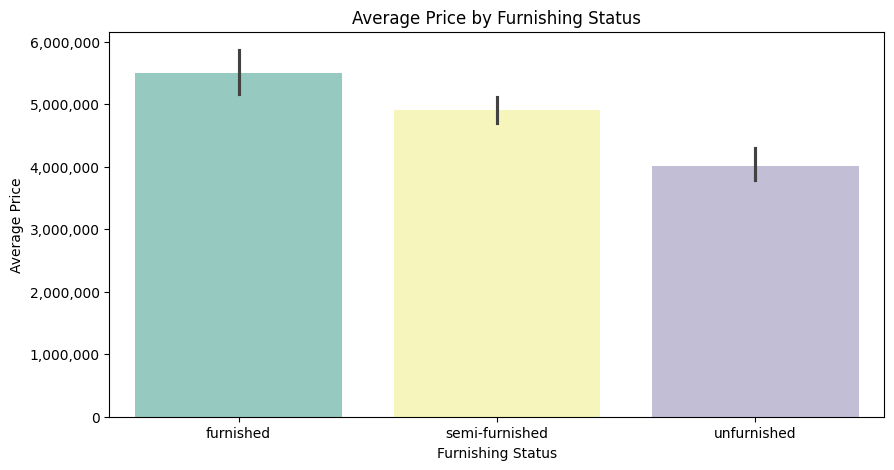

In [16]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='furnishingstatus', y='price', palette='Set3')
plt.title('Average Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')

# get rid of scientific notation
def format_func(value, tick_number):
    return f'{value:,.0f}'

formatter = FuncFormatter(format_func)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

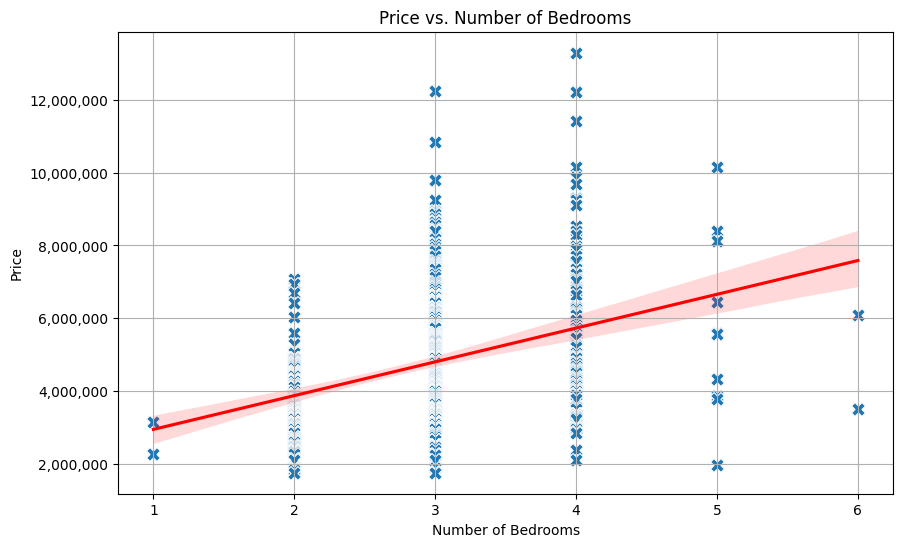

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bedrooms', y='price', marker='X', s=100)
#add line
sns.regplot(data=df, x='bedrooms', y='price', scatter=False, color='red')

plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)

def format_func(value, tick_number):
    return f'{value:,.0f}'

formatter = FuncFormatter(format_func)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [29]:
print(f'Shape of Dataset before drop duplicated Row is: {df.shape}')
df= df.drop_duplicates()
print(f'Shape of Dataset After Drop Duplicated Row is: {df.shape}')

Shape of Dataset before drop duplicated Row is: (545, 13)
Shape of Dataset After Drop Duplicated Row is: (545, 13)


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Load the dataset
csv_file_path = '/content/drive/MyDrive/Datasets/Housing.csv'
df = pd.read_csv(csv_file_path)
copy_df = pd.read_csv(csv_file_path)

# Separate numerical and categorical features
numerical_features = df[['area', 'bedrooms', 'bathrooms', 'stories']]
categorical_features = df[['mainroad', 'guestroom', 'basement',
                            'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea', 'furnishingstatus']]

# categorical features into a one-hot encoded format by creating binary columns for each category
# The sparse_output=True parameter returns the encoded data as a sparse matrix
# handle_unknown='ignore' option ensures that if new categories appear during transformation that weren't present in the training data, they are ignored rather than causing errors
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoded_categorical_features = encoder.fit_transform(categorical_features)

# Debug
encoded_feature_array = encoded_categorical_features.toarray()
#Create DataFrame
encoded_feature_df = pd.DataFrame(encoded_feature_array, columns=encoder.get_feature_names_out(categorical_features.columns))

print("Encoded Categorical Features:")
print(encoded_feature_df.head())

# y = c + b * x
# where y = estimated dependent score
# c = constant
# b = regression coefficient,
# x = independent variable.
X = hstack([numerical_features, encoded_categorical_features])  # independent variables
y = df['price']  # dependent variables

# Scale the independent variables
scale = StandardScaler(with_mean=False)
X = scale.fit_transform(X)

Encoded Categorical Features:
   mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  basement_no  \
0          0.0           1.0           1.0            0.0          1.0   
1          0.0           1.0           1.0            0.0          1.0   
2          0.0           1.0           1.0            0.0          0.0   
3          0.0           1.0           1.0            0.0          0.0   
4          0.0           1.0           0.0            1.0          0.0   

   basement_yes  hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0           0.0                 1.0                  0.0                 0.0   
1           0.0                 1.0                  0.0                 0.0   
2           1.0                 1.0                  0.0                 1.0   
3           1.0                 1.0                  0.0                 0.0   
4           1.0                 1.0                  0.0                 0.0   

   airconditioning_yes  parking_0  parking_1

In [26]:
#randomly split a dataset into two subsets: a training set and a testing set
#20% of the data will be used for testing
#5032 seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5032)

Evaluation of Linear Regression models https://www.linkedin.com/pulse/evaluating-linear-regression-models-rany-elhousieny-phd%E1%B4%AC%E1%B4%AE%E1%B4%B0/


In [27]:
model =  LinearRegression()
# trains the linear regression model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 724166075231.4868
Mean Absolute Error (MAE): 633058.3204078567
Root Mean Squared Error (RMSE): 850979.479912111
R² Score: 0.7980418657776449


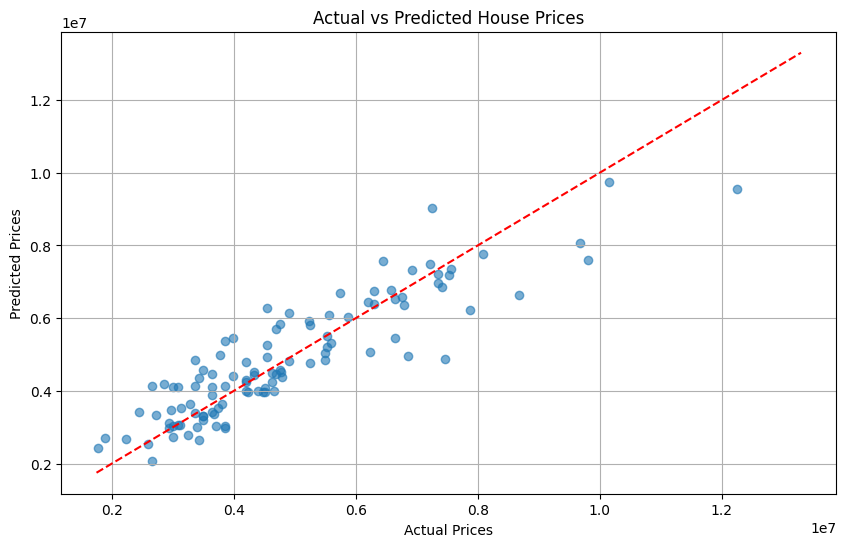

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()